## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory data analysis

In [4]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

Text(0, 0.5, 'Total Occurences')

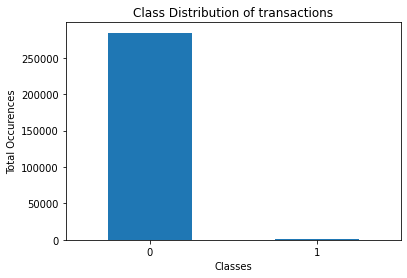

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
classes.plot(kind= 'bar', rot=0)
plt.title("Class Distribution of transactions")
plt.xlabel("Classes")
plt.ylabel("Total Occurences")

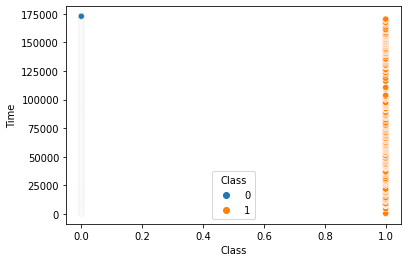

In [8]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x='Class', y='Time', hue='Class', data=df)

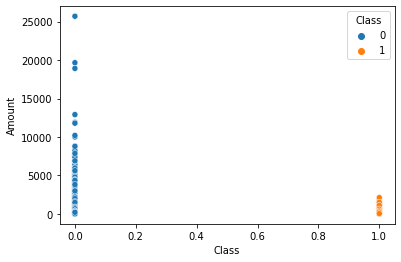

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x='Class', y='Amount', hue='Class', data=df)

In [10]:
# Drop unnecessary columns

y = df['Class']
X = df.drop(['Class'], axis = 1)

### Splitting the data into train & test data

In [11]:
y= df['Class']#class variable

In [12]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [13]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
372
120


### Plotting the distribution of a variable

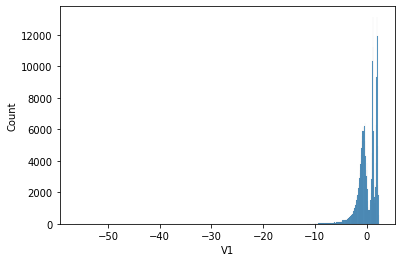

In [14]:
# plot the histogram of a variable from the dataset to see the skewness
sns.histplot(data=df, x = "V1")

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [15]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(copy=False)
df_trans = power.fit_transform(df)

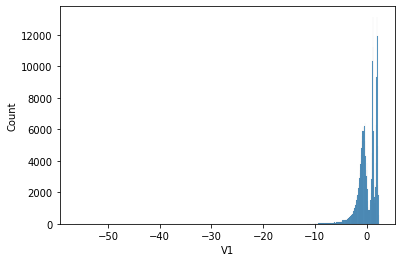

In [16]:
# plot the histogram of a variable from the dataset again to see the result 
sns.histplot(data=df, x="V1")

## Model Building
- Build different models on the imbalanced dataset and see the result

In [17]:
# Logistic Regression
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
#num_C =   #--> list of values
#cv_num =    #--> list of values
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)

0.9991011488441336

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [24]:
#perform cross validation
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

from sklearn.metrics import make_scorer, precision_recall_curve, auc
from sklearn.model_selection import RepeatedStratifiedKFold
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(), 
               GradientBoostingClassifier(),
               SVC(probability=True), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(),
               RandomForestClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


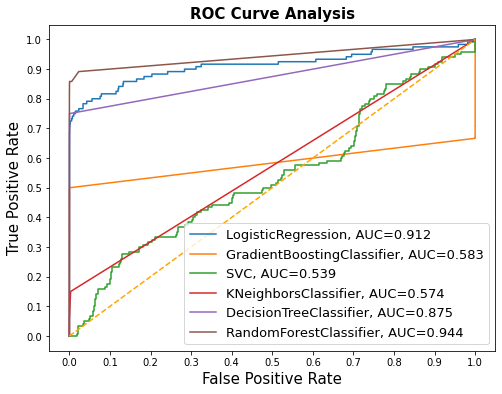

In [25]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [31]:
X.shape

(284807, 30)

In [33]:
clf = RandomForestClassifier()  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.9483394764731811


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 13
3rd Top var = 15


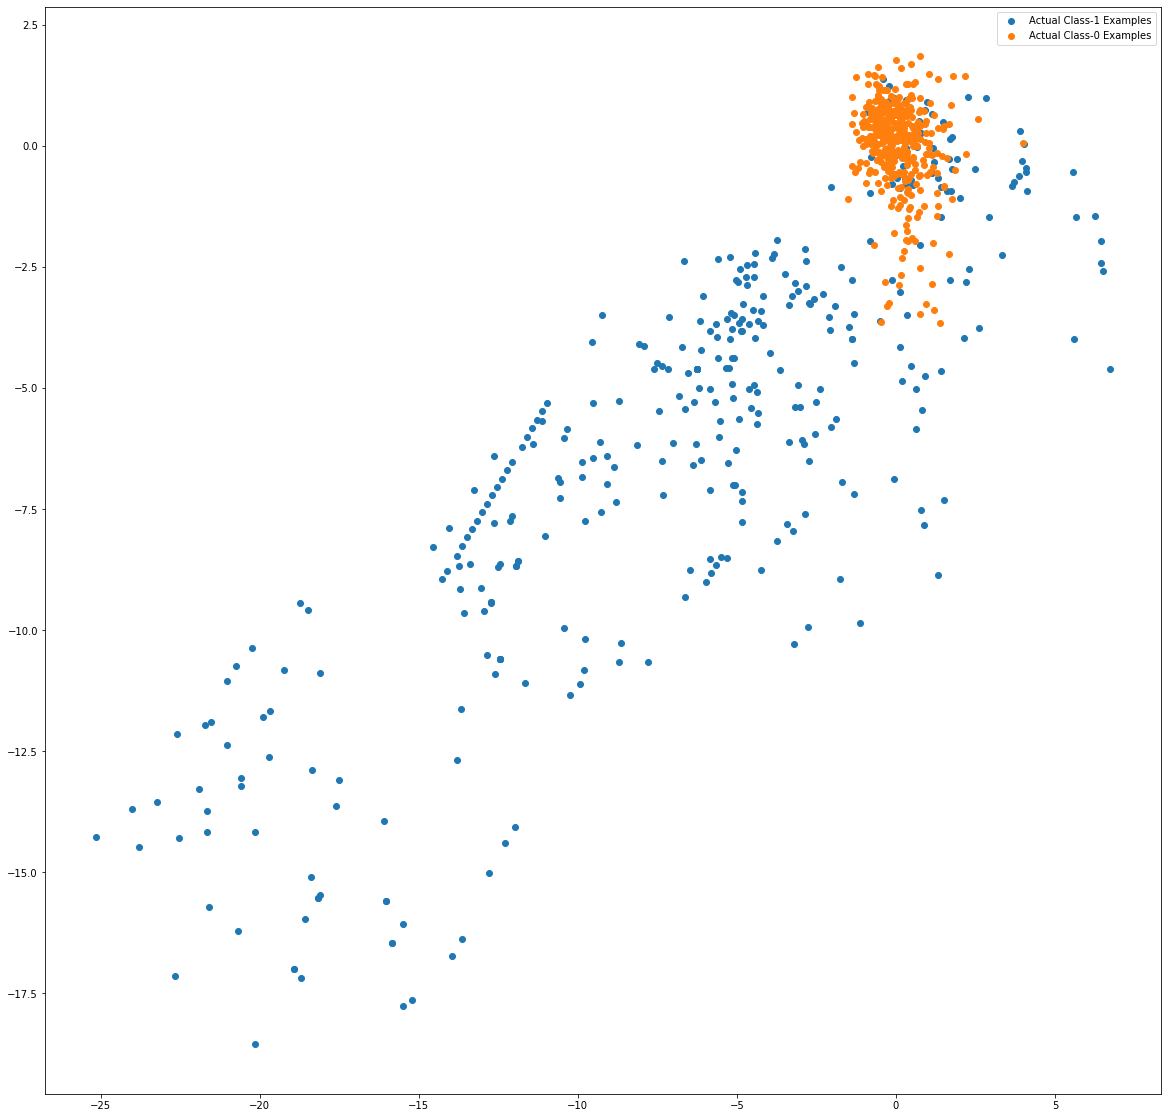

In [34]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [35]:
# importing RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

#CHecking shape and class count after ros
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_ros)) 
print(X_ros.shape)
print(y_ros.shape)

Resampled dataset shape Counter({0: 213233, 1: 213233})
(426466, 30)
(426466,)


In [36]:
#importing SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

#CHecking shape and class count after smote
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_sm))
print(X_sm.shape)
print(y_sm.shape)

Resampled dataset shape Counter({0: 213233, 1: 213233})
(426466, 30)
(426466,)


In [37]:
# importing ADASYN

from imblearn.over_sampling import ADASYN

ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

# CHecking shape and class count after ADASYN
from collections import Counter

print('Resampled dataset shape %s' % Counter(y_ada))
print(X_ada.shape)
print(y_ada.shape)

Resampled dataset shape Counter({0: 213233, 1: 213224})
(426457, 30)
(426457,)


## Model Building
- Build different models on the balanced dataset and see the result

In [71]:
# Creating a function 


def clf_score(clf):
  prob = clf.predict_proba(X_test)
  prob = prob[:, 1]
  auc = roc_auc_score(y_test, prob)    
  print('AUC: %.2f' % auc)
  return auc
  

In [73]:
# Logistic Regression with RandomOverSampler
logreg_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
logreg_ros = logreg_best.fit(X_ros,y_ros)

# Printing 
clf_score(logreg_ros)

AUC: 0.97


0.9680574899411947

In [46]:
# Logistic Regression with SMOTE
from sklearn import linear_model #import the package

#num_C =  #--> list of values
#cv_num =   #--> list of values

logreg_sm = logreg_best.fit(X_sm,y_sm)

# Printing 
clf_score(logreg_sm)

AUC: 0.96


0.962885763390638

In [47]:
# Logistic Regression with ADA
logreg_ada = logreg_best.fit(X_ada,y_ada)

# Printing ROC curve and accuracy scores
clf_score(logreg_ada)

AUC: 0.95


0.9459155154141226

In [52]:
# KNN with RandomOverSampler re-sampled data
knn = KNeighborsClassifier(n_neighbors=3)

knn_ros = knn.fit(X_ros,y_ros)

#Printing  

clf_score(knn_ros)

AUC: 0.57


0.5659210489294054

In [53]:
# KNN with SMOTE re-sampled data

knn = KNeighborsClassifier(n_neighbors=3)

knn_sm = knn.fit(X_sm,y_sm)

#Printing ROC 

clf_score(knn_sm)

AUC: 0.76


0.76452495005768

In [54]:
# KNN with ADASYN re-sampled data

knn = KNeighborsClassifier(n_neighbors=3)

knn_ada = knn.fit(X_ada,y_ada)

#Printing ROC 

clf_score(knn_ada)

AUC: 0.76


0.7624454268778782

In [56]:
# Building model with RandomOverSampler

dt = DecisionTreeClassifier(max_depth = 5)
dt_ros = dt.fit(X_ros,y_ros)

#Plotting ROC
clf_score(dt_ros)

AUC: 0.92


0.9216932556765425

In [58]:
# Building model with SMOTE

dt = DecisionTreeClassifier(max_depth = 5)
dt_sm = dt.fit(X_sm,y_sm)

#Plotting ROC
clf_score(dt_sm)

AUC: 0.96


0.9575493795897696

In [60]:
# Building model with ADASYN

dt = DecisionTreeClassifier(max_depth = 5)
dt_ada = dt.fit(X_ada,y_ada)

#Plotting ROC
clf_score(dt_ada)

AUC: 0.95


0.9526063208688558

In [61]:
#Building Random forest with best parameters on RandomOverSampler
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_ros = rf.fit(X_ros,y_ros)

#Plotting ROC
clf_score(RFC_ros)

AUC: 0.98


0.9827901226752201

In [62]:
#Building Random forest with best parameters on SMOTE
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_sm = rf.fit(X_sm,y_sm)

#Plotting ROC
clf_score(RFC_sm)

AUC: 0.99


0.9867788844808343

In [63]:
#Building Random forest with best parameters on ADASYN
rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_ada = rf.fit(X_ada,y_ada)

#Plotting ROC
clf_score(RFC_ada)

AUC: 0.98


0.9842658244468829

### Random Oversampling

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

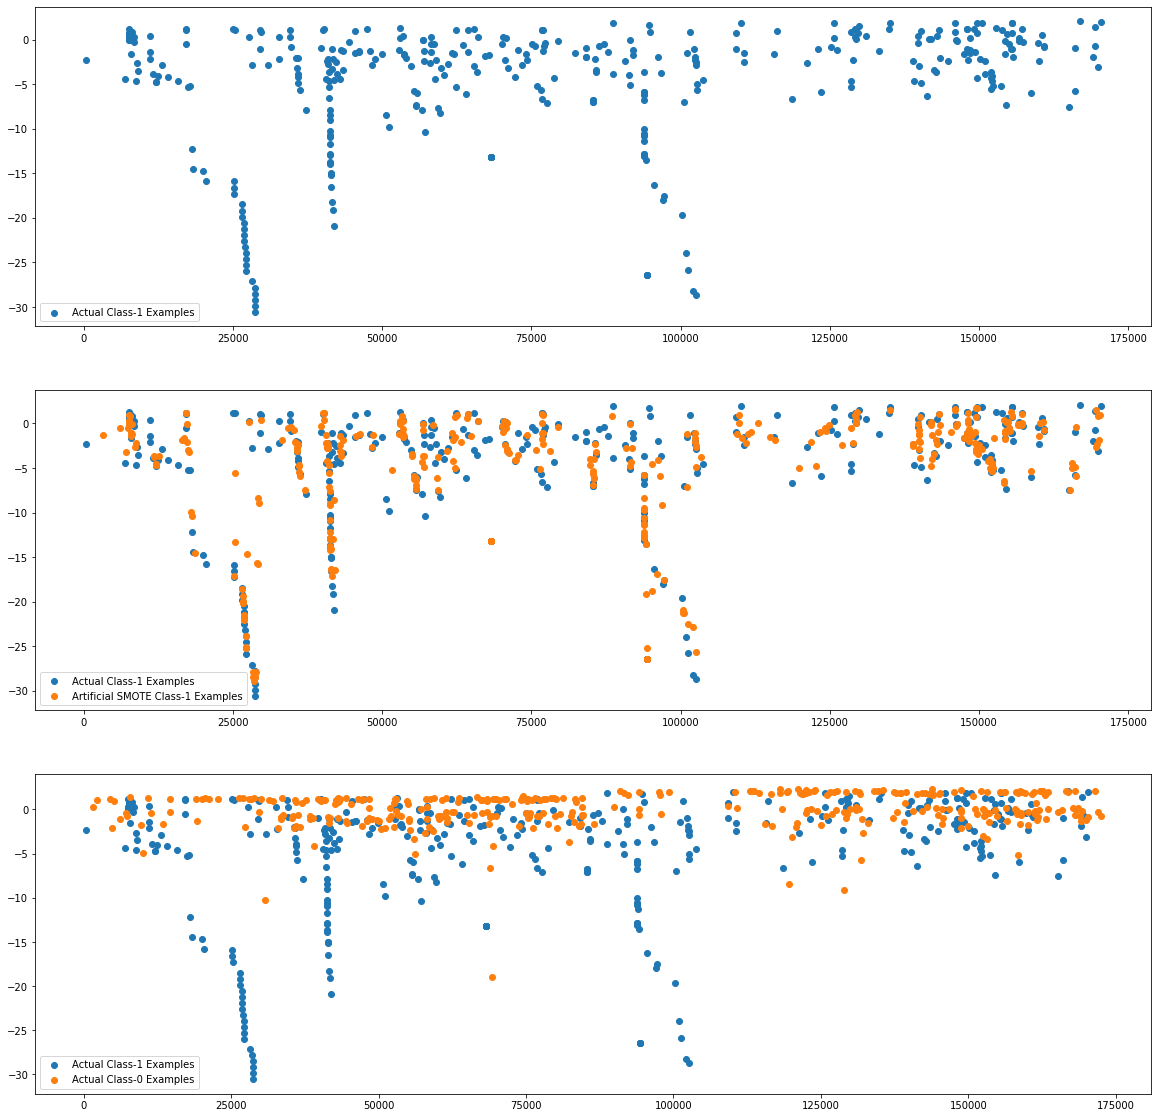

In [69]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_sm_1 = X_train_sm[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_sm_1[:X_train_1.shape[0], 0], X_train_sm_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

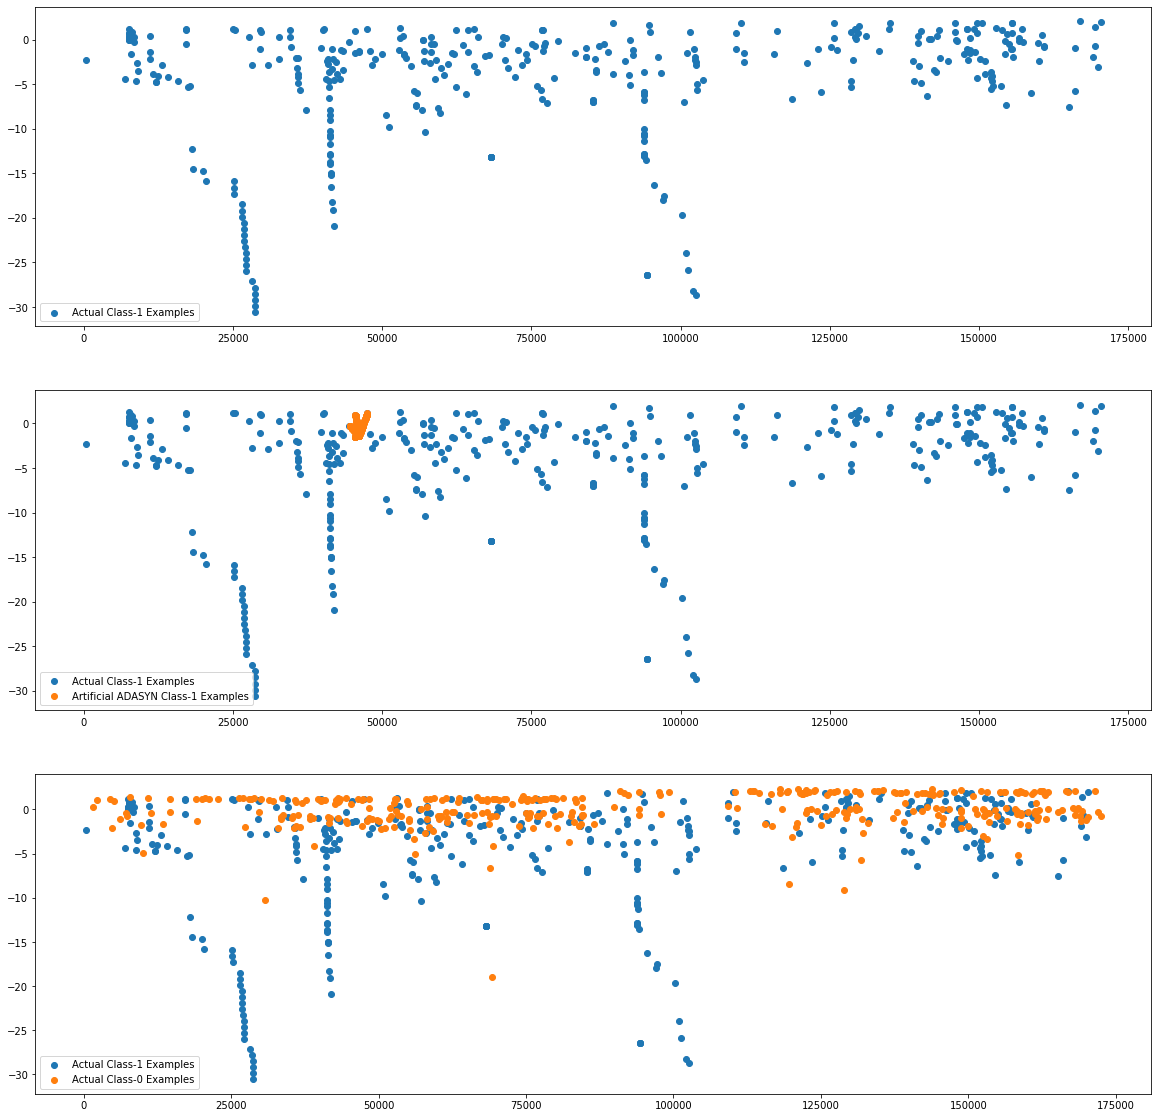

In [70]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_ada_1 = X_train_ada[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_1[:X_train_1.shape[0], 0], X_train_ada_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset

Top var = 18
2nd Top var = 13
3rd Top var = 15


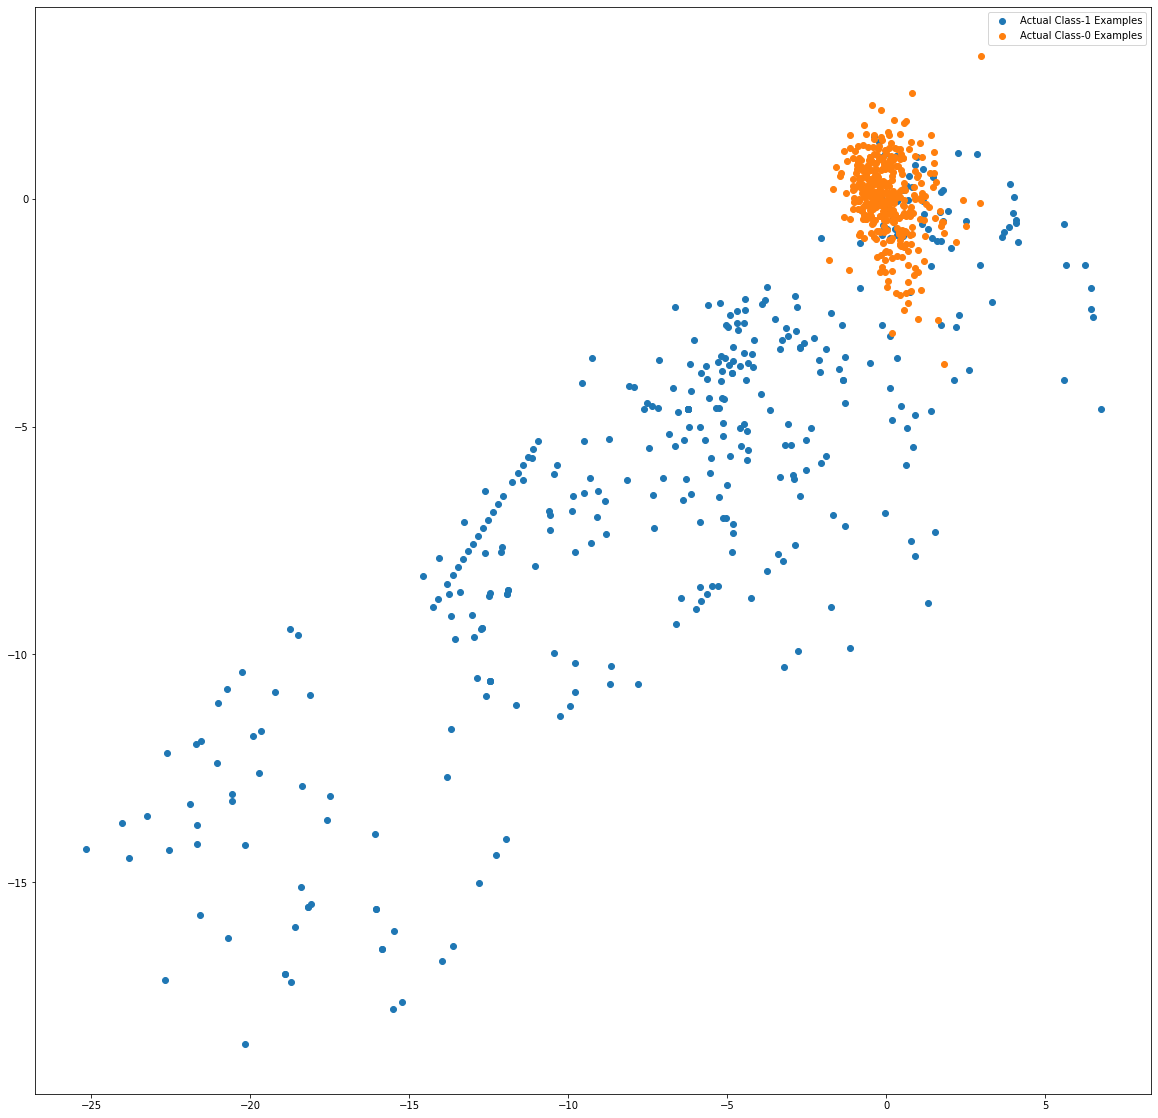

In [77]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

After comparing all models we can see that the Random forest model has the highest AUC score and that is why this will be our final model because of the exceptional results it provides.
After applying SMOTE Oversampling technique for Random Forest Classifier we get AUC score = 0.99
After applying ADASYN Oversampling technique for Random Forest Classifier we get AUC score = 0.98
After applying SMOTE RandomOverSampling technique for Random Forest Classifier we get AUC score = 0.98